# Lotka-Voltera pure Python

\begin{aligned}
{\frac {dx}{dt}}&=\alpha x-\beta xy,\\{\frac {dy}{dt}}&= -\delta y-\gamma xy,
\end{aligned}

where,

* $x$ is the number of prey,
* $y$ is the number of predator,
* $\alpha$, $\beta$, $\gamma$, $\delta$ parameters describing the interaction between the species.

In [88]:
import numpy as np
from scipy.integrate import odeint
import timeit

**Defining right-hand side**

In [89]:
def dudt(u, t, alpha, beta, delta, gamma):
    x, y = u
    return [alpha*x - beta*x*y,
                -delta*y + gamma*x*y]

**Initial conditions, parameters and time discretisation**

In [95]:
u0 = [1.0, 1.0]
t = np.linspace(0, 10, 10000)
p = (1.5, 1.0, 3.0, 1.0)

**Wrapping function to time**

In [91]:
def time_func():
    odeint(dudt, u0, t, args=p, rtol = 1e-8, atol=1e-8)

**Run 1e5 times and time**

In [92]:
t = timeit.Timer(time_func).timeit(number=10000)/10000*1e6
print("time: " + str(t) + " µs")

time: 2171.057738899981 µs


**Result**

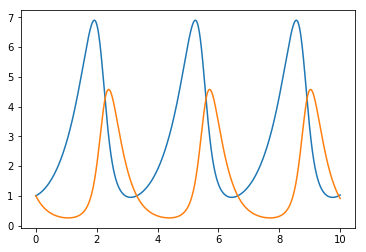

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

sol = odeint(dudt, u0, t, args=p,rtol = 1e-8, atol=1e-8)
plt.plot(t,sol[:,0],t,sol[:,1])